**RQ2: DESCRIPTIVE AND INFERENTIAL STATISTICAL TESTS**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load LOC metric data

In [2]:
app_loc_data = pd.read_csv('./groups/loc/app_loc.csv', index_col=0)
database_loc_data = pd.read_csv('./groups/loc/database_loc.csv', index_col=0)
nlp_loc_data = pd.read_csv('./groups/loc/nlp_loc.csv', index_col=0)
ide_loc_data = pd.read_csv('./groups/loc/ide_loc.csv', index_col=0)
desk_loc_data = pd.read_csv('./groups/loc/desk_loc.csv', index_col=0)
web_loc_data = pd.read_csv('./groups/loc/web_loc.csv', index_col=0)
lib_loc_data = pd.read_csv('./groups/loc/lib_loc.csv', index_col=0)
cicd_loc_data = pd.read_csv('./groups/loc/cicd_loc.csv', index_col=0)

Load DIT metric data

In [3]:
app_dit_data = pd.read_csv('./groups/dit/app_dit.csv', index_col=0)
database_dit_data = pd.read_csv('./groups/dit/database_dit.csv', index_col=0)
nlp_dit_data = pd.read_csv('./groups/dit/nlp_dit.csv', index_col=0)
ide_dit_data = pd.read_csv('./groups/dit/ide_dit.csv', index_col=0)
desk_dit_data = pd.read_csv('./groups/dit/desk_dit.csv', index_col=0)
web_dit_data = pd.read_csv('./groups/dit/web_dit.csv', index_col=0)
lib_dit_data = pd.read_csv('./groups/dit/lib_dit.csv', index_col=0)
cicd_dit_data = pd.read_csv('./groups/dit/cicd_dit.csv', index_col=0)

Load LCC metric data

In [4]:
app_lcc_data = pd.read_csv('./groups/lcc/app_lcc.csv', index_col=0)
database_lcc_data = pd.read_csv('./groups/lcc/database_lcc.csv', index_col=0)
nlp_lcc_data = pd.read_csv('./groups/lcc/nlp_lcc.csv', index_col=0)
ide_lcc_data = pd.read_csv('./groups/lcc/ide_lcc.csv', index_col=0)
desk_lcc_data = pd.read_csv('./groups/lcc/desk_lcc.csv', index_col=0)
web_lcc_data = pd.read_csv('./groups/lcc/web_lcc.csv', index_col=0)
lib_lcc_data = pd.read_csv('./groups/lcc/lib_lcc.csv', index_col=0)
cicd_lcc_data = pd.read_csv('./groups/lcc/cicd_lcc.csv', index_col=0)

**Boxplots:** useful to graph the IQR range, HORIZONTAL LINE = median, BOX = middle 50% of the data, UPPER WHISKER = top 25%, LOWER WHISKER = bottom 25%. More dispersed distributions have wider boxes.
If the median is closer to one side or the other of the box, it’s a skewed distribution. When the median is near the center of the interquartile range, your distribution is symmetric.

In [5]:
def draw_boxplot(data1, data2, variable, category1, category2):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    # Plot 1
    boxprops = dict(facecolor='lightblue', color='black')
    axes[0].boxplot([data1.iloc[i].dropna() for i in range(len(data1))], patch_artist=True, boxprops=boxprops)
    axes[0].set_xticklabels(data1.index.values)
    axes[0].set_ylabel(str(variable)+' variable')
    axes[0].set_title('Boxplot of '+str(variable)+' in '+str(category1)+' category')
    # Plot 2
    axes[1].boxplot([data2.iloc[i].dropna() for i in range(len(data2))], patch_artist=True, boxprops=boxprops)
    axes[1].set_xticklabels(data2.index.values)
    axes[1].set_ylabel(str(variable)+' variable')
    axes[1].set_title('Boxplot of '+str(variable)+' in '+str(category2)+' category')
    plt.tight_layout()
    plt.show()

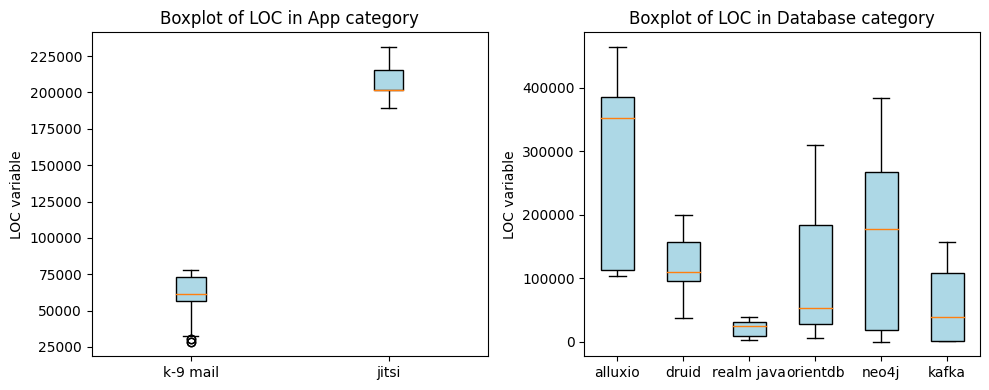

In [6]:
draw_boxplot(app_loc_data, database_loc_data, 'LOC', 'App', 'Database')

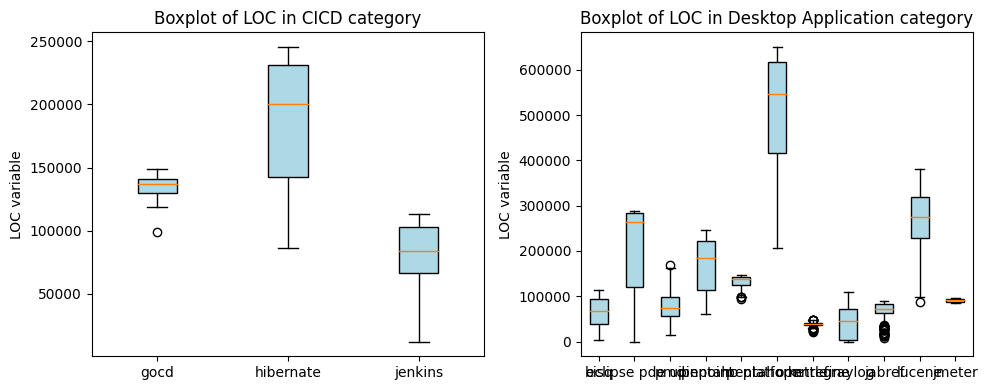

In [7]:
draw_boxplot(cicd_loc_data, desk_loc_data, 'LOC', 'CICD', 'Desktop Application')

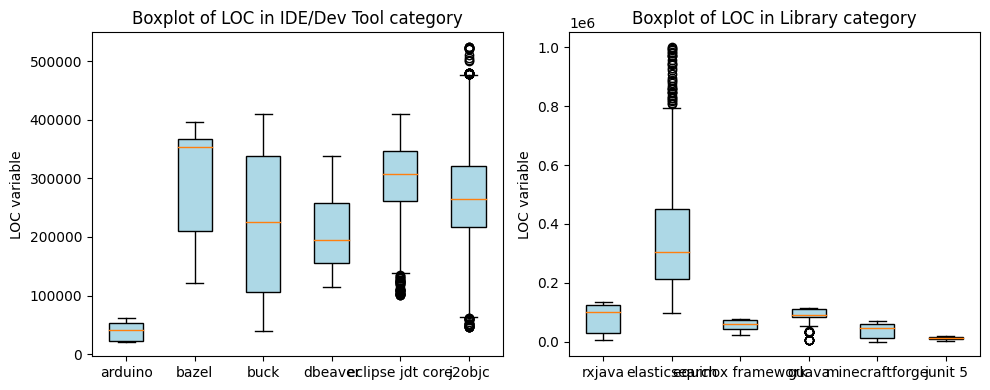

In [8]:
draw_boxplot(ide_loc_data, lib_loc_data, 'LOC', 'IDE/Dev Tool', 'Library')

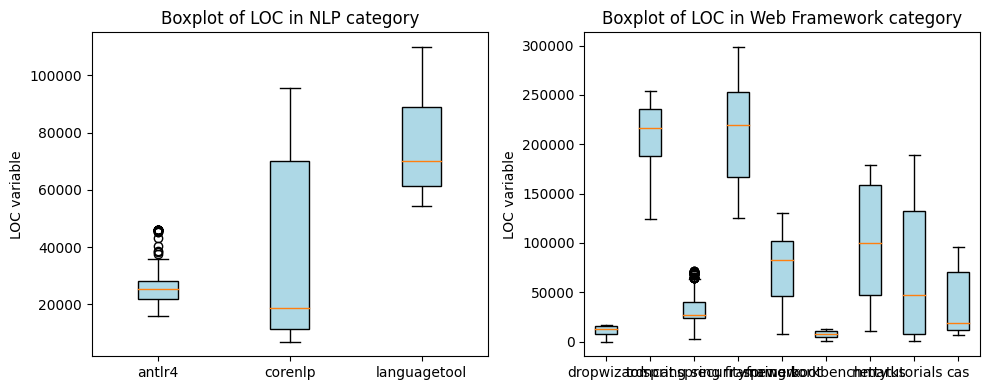

In [9]:
draw_boxplot(nlp_loc_data, web_loc_data, 'LOC', 'NLP', 'Web Framework')

**Interquartile Range**

In [10]:
# Function to build a df with IQR values
from scipy import stats
import pandas as pd

def calculate_iqr(data, variable):
    iqr_data = {
        'Project': [],
        'Variable': [],
        'IQR': [],
    }

    for project in data.index.values:
        iqr = stats.iqr(data.loc[project].dropna())
        iqr_data['Project'].append(project)
        iqr_data['Variable'] = variable
        iqr_data['IQR'].append(iqr)

    iqr_df = pd.DataFrame(iqr_data)
    return iqr_df

In [11]:
# you can calculate the iqr for each group by changing the data variable
data = app_loc_data

iqr_df = calculate_iqr(data, 'LOC')
iqr_df

,Project,Variable,IQR
0,k-9 mail,LOC,16416.0
1,jitsi,LOC,14065.0


**Pearson Correlation Coefficient**

Find the pairwise correlation of all columns in every category dataframe. If there is no reason to assume that the relation is linear, then one can (a) transform one or both variables using logarithm and then checking whether the relation would 
be meaningfully linear, and (b) use a different correlation coefficient, Spearman’s \rho or Kendall’s \tau.

In [12]:
# function that returns a list of correlation matrices
def list_of_correlations(draw_list):
    corr_list = []
    for data in draw_list:
        corr = data.T.corr()
        corr_list.append(corr)
    return corr_list

# function that draws a plot with 4 correlation matrices
def draw_corr_matrixes(correlation_list, categories_list):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
    sns.heatmap(correlation_list[0], ax=axes[0, 0], cmap='coolwarm', annot=True, fmt=".2f")
    axes[0, 0].set_title(str(categories_list[0]))
    sns.heatmap(correlation_list[1], ax=axes[0, 1], cmap='coolwarm', annot=True, fmt=".2f")
    axes[0, 1].set_title(str(categories_list[1]))
    sns.heatmap(correlation_list[2], ax=axes[1, 0], cmap='coolwarm', annot=True, fmt=".2f")
    axes[1, 0].set_title(str(categories_list[2]))
    sns.heatmap(correlation_list[3], ax=axes[1, 1], cmap='coolwarm', annot=True, fmt=".2f")
    axes[1, 1].set_title(str(categories_list[3]))
    plt.tight_layout()
    plt.show()

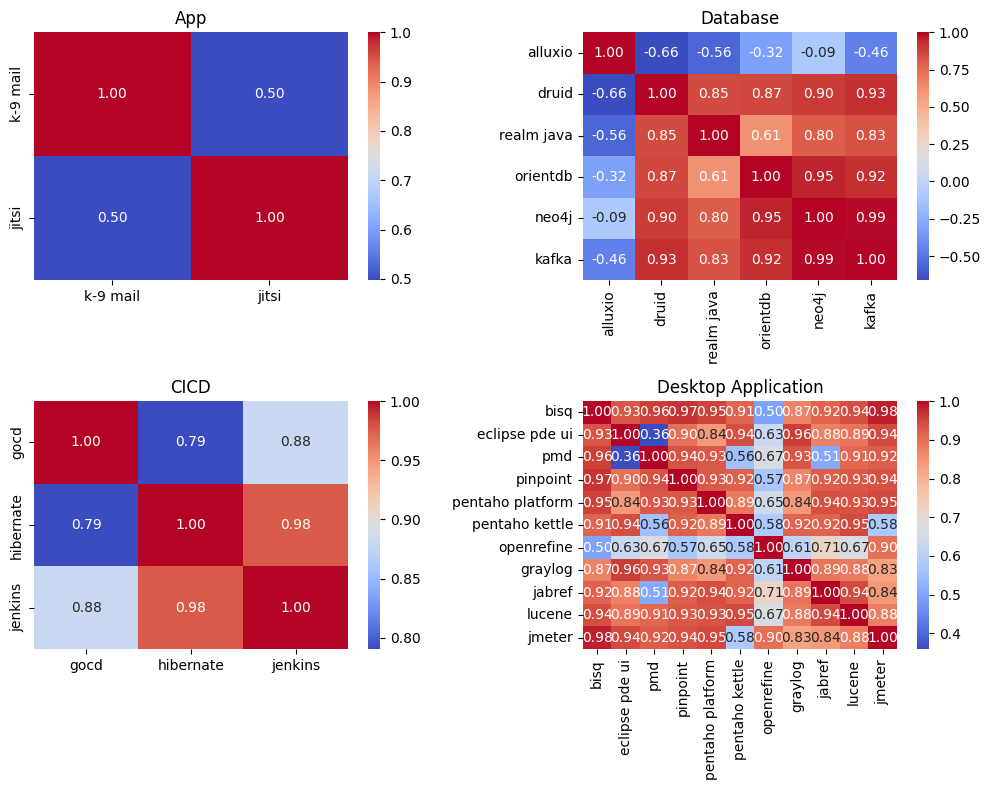

In [13]:
draw_list = [app_loc_data, database_loc_data, cicd_loc_data, desk_loc_data]
draw_corr_matrixes(list_of_correlations(draw_list), ['App', 'Database', 'CICD', 'Desktop Application'])

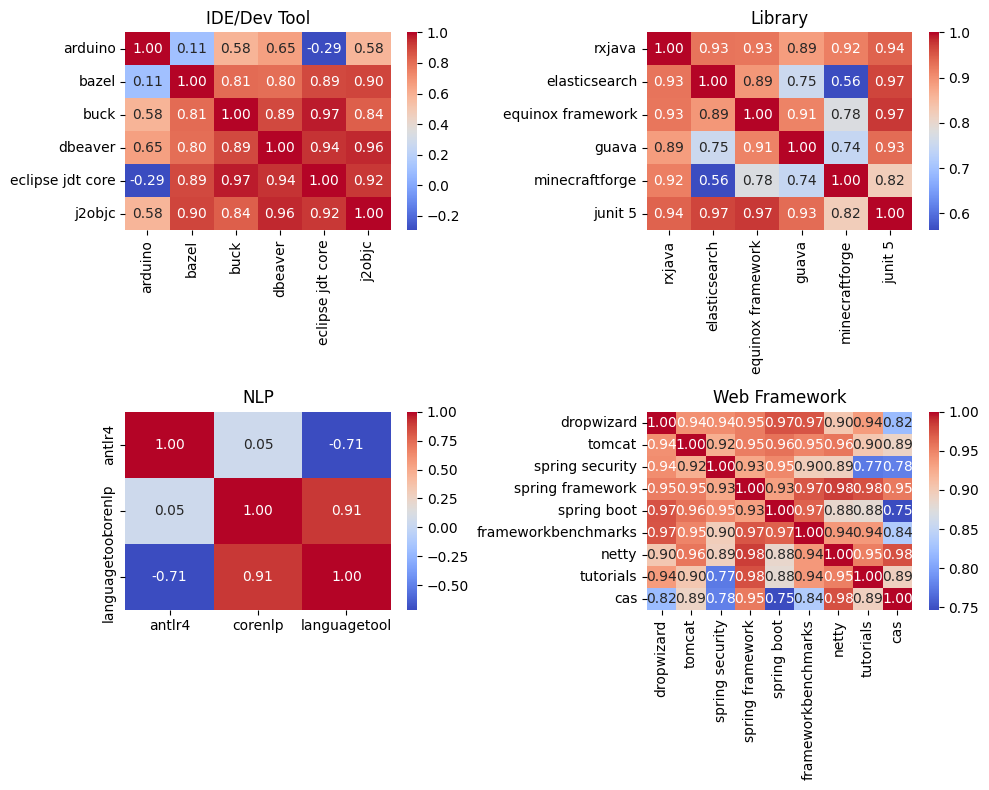

In [14]:
draw_list = [ide_loc_data, lib_loc_data, nlp_loc_data, web_loc_data]
draw_corr_matrixes(list_of_correlations(draw_list), ['IDE/Dev Tool', 'Library', 'NLP', 'Web Framework'])

Q-Q plots, see if there are deviations from normality

In [15]:
def draw_qq_plot(data, variable):
    num_plots = len(data)
    num_rows = 1 if num_plots <= 4 else 2
    num_cols = num_plots // num_rows + num_plots % num_rows

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 4))

    if num_rows == 1:
        axes = [axes]

    for i, ax_row in enumerate(axes):
        for j, ax in enumerate(ax_row):
            if i * num_cols + j < num_plots:
                stats.probplot(data.iloc[i * num_cols + j].dropna(), dist="norm", plot=ax)
                ax.set_title('Q-Q plot for ' + str(data.index[i * num_cols + j]) + ' ' + str(variable))

    plt.tight_layout()
    plt.show()

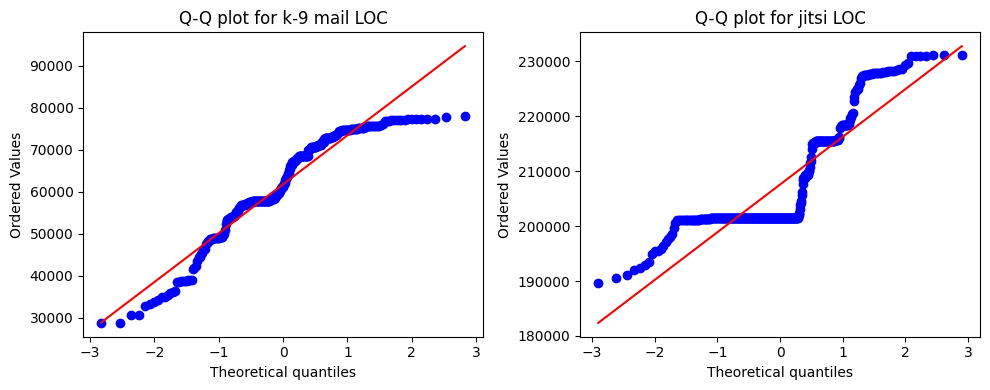

In [16]:
draw_qq_plot(app_loc_data, 'LOC')

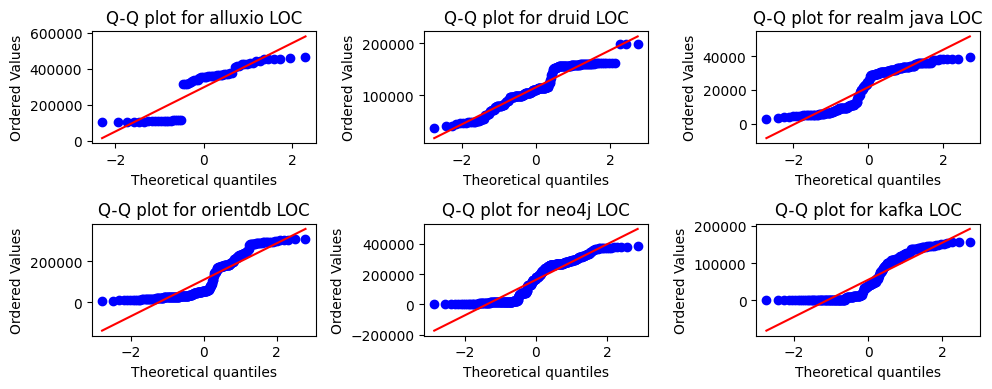

In [17]:
draw_qq_plot(database_loc_data, 'LOC')

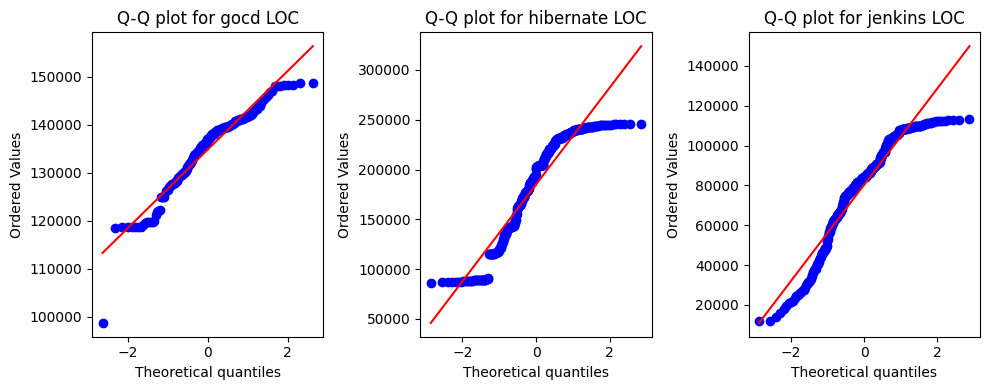

In [18]:
draw_qq_plot(cicd_loc_data, 'LOC')

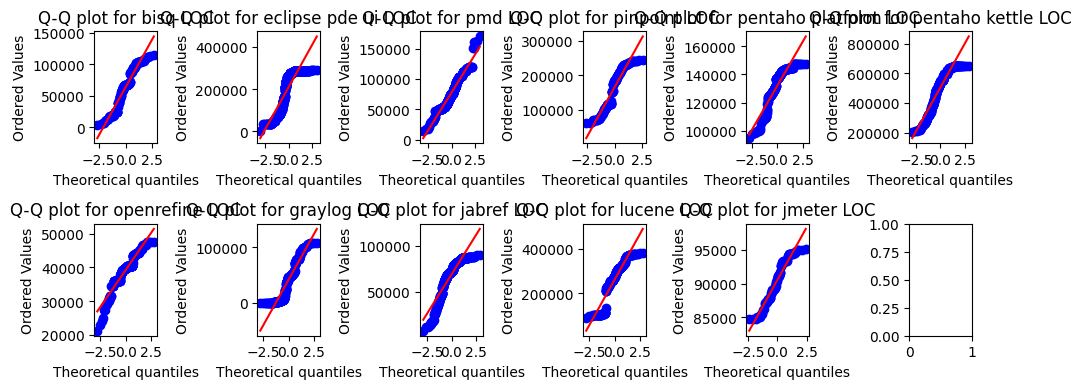

In [19]:
draw_qq_plot(desk_loc_data, 'LOC')

There appear many violations, check statistically with Shapiro-Wilk test for normality

In [20]:
def shapiro_wilk(data):
    variables = data.columns

    for i in range(len(variables)):
        var1 = variables[i]
        result = stats.shapiro(data[var1].dropna())
        print(f"Shapiro-Wilk test {var1}: statistics = {result.statistic}, p-value = {result.pvalue}")

In [21]:
# shapiro-wilk test inside a group
shapiro_wilk(database_loc_data.T)

Shapiro-Wilk test alluxio: statistics = 0.8009783625602722, p-value = 7.048932104680716e-08
Shapiro-Wilk test druid: statistics = 0.9373171329498291, p-value = 2.0954219692725928e-08
Shapiro-Wilk test realm java: statistics = 0.869181752204895, p-value = 1.8094052731815191e-12
Shapiro-Wilk test orientdb: statistics = 0.8313475251197815, p-value = 3.999698311962075e-16
Shapiro-Wilk test neo4j: statistics = 0.888994574546814, p-value = 9.934129460340523e-15
Shapiro-Wilk test kafka: statistics = 0.8445673584938049, p-value = 2.437086245158683e-14


Since the p-values are close to zero we reject the null hypothesis, so the data does not come from normal distributions

**Kruskal Wallis test**

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs. Post hoc comparisons between groups are required to determine which groups are different.

In [22]:
def inter_group_pairwise_kruskal(data):
    variables = data.columns

    for i in range(len(variables)):
        var1 = variables[i]
        for j in range(i + 1, len(variables)):
            var2 = variables[j]
            result = stats.kruskal(data[var1].dropna(), data[var2].dropna())
            if result.pvalue > 0.05:
                print(f"Kruskal-Wallis test {var1} vs {var2}: statistics = {result.statistic}, p-value = {result.pvalue}")

In [23]:
inter_group_pairwise_kruskal(web_loc_data.T)

Kruskal-Wallis test tomcat vs spring framework: statistics = 1.5122314299513784, p-value = 0.21879890546411515
Kruskal-Wallis test spring security vs tutorials: statistics = 3.6298268245809107, p-value = 0.05675272152468264
Kruskal-Wallis test spring security vs cas: statistics = 1.4591665905280504, p-value = 0.22706277146109774
Kruskal-Wallis test tutorials vs cas: statistics = 2.732449258153126, p-value = 0.09832838529041255


In [24]:
def intra_group_pairwise_kruskal(data1, data2):
    variables1 = data1.columns
    variables2 = data2.columns

    for var1 in variables1:
        for var2 in variables2:
            result = stats.kruskal(data1[var1].dropna(), data2[var2].dropna())
            if result.pvalue > 0.05:
                print(f"Kruskal-Wallis test {var1} vs {var2}: statistics = {result.statistic}, p-value = {result.pvalue}")

In [25]:
intra_group_pairwise_kruskal(app_loc_data.T, database_loc_data.T)

Kruskal-Wallis test k-9 mail vs orientdb: statistics = 0.7545255672603186, p-value = 0.38504718103669067


If variables have a significant p-value which each variable violates the assumption of normality. Therefore, the Wilcoxon signed rank test, a.k.a the Wilcoxon T test, is the correct test to use.

In [26]:
#stats.wilcoxon(insert_the_variables)

The Kolmogorov Smirnov test (KS test or K-S test) is used to compare two distributions to determine if they are pulling from the same underlying distribution.

In [27]:
from scipy.stats import kstest

kstest(app_loc_data.iloc[0].dropna(), nlp_loc_data.iloc[2].dropna())

KstestResult(statistic=0.2945439244471457, pvalue=5.62240061528596e-05)